# TITANIC PROJECT - MACHINE LEARNING FROM DISASTER

## 1. Domain Research

### 1.1 Problem Identification

Pada tanggal 15 April 1912, dalam pelayaran perdananya, Kapal Titanic, yang dianggap "tidak dapat tenggelam," ternyata tenggelam juga setelah menabrak gunung es. Sayangnya, jumlah sekoci yang tersedia tidak mencukupi untuk semua orang di kapal, sehingga menyebabkan 1.502 dari 2.224 penumpang dan awak kapal meninggal dunia.

Meskipun terdapat faktor keberuntungan dalam bertahan hidup, tampaknya beberapa kelompok orang memiliki peluang lebih besar untuk selamat dibandingkan dengan yang lain.

Pada project kali ini, anda diminta untuk membangun model prediksi untuk menjawab pertanyaan: "Jenis orang seperti apa yang lebih mungkin selamat?" dengan menggunakan data penumpang (seperti nama, usia, jenis kelamin, kelas sosial-ekonomi, dan sebagainya).
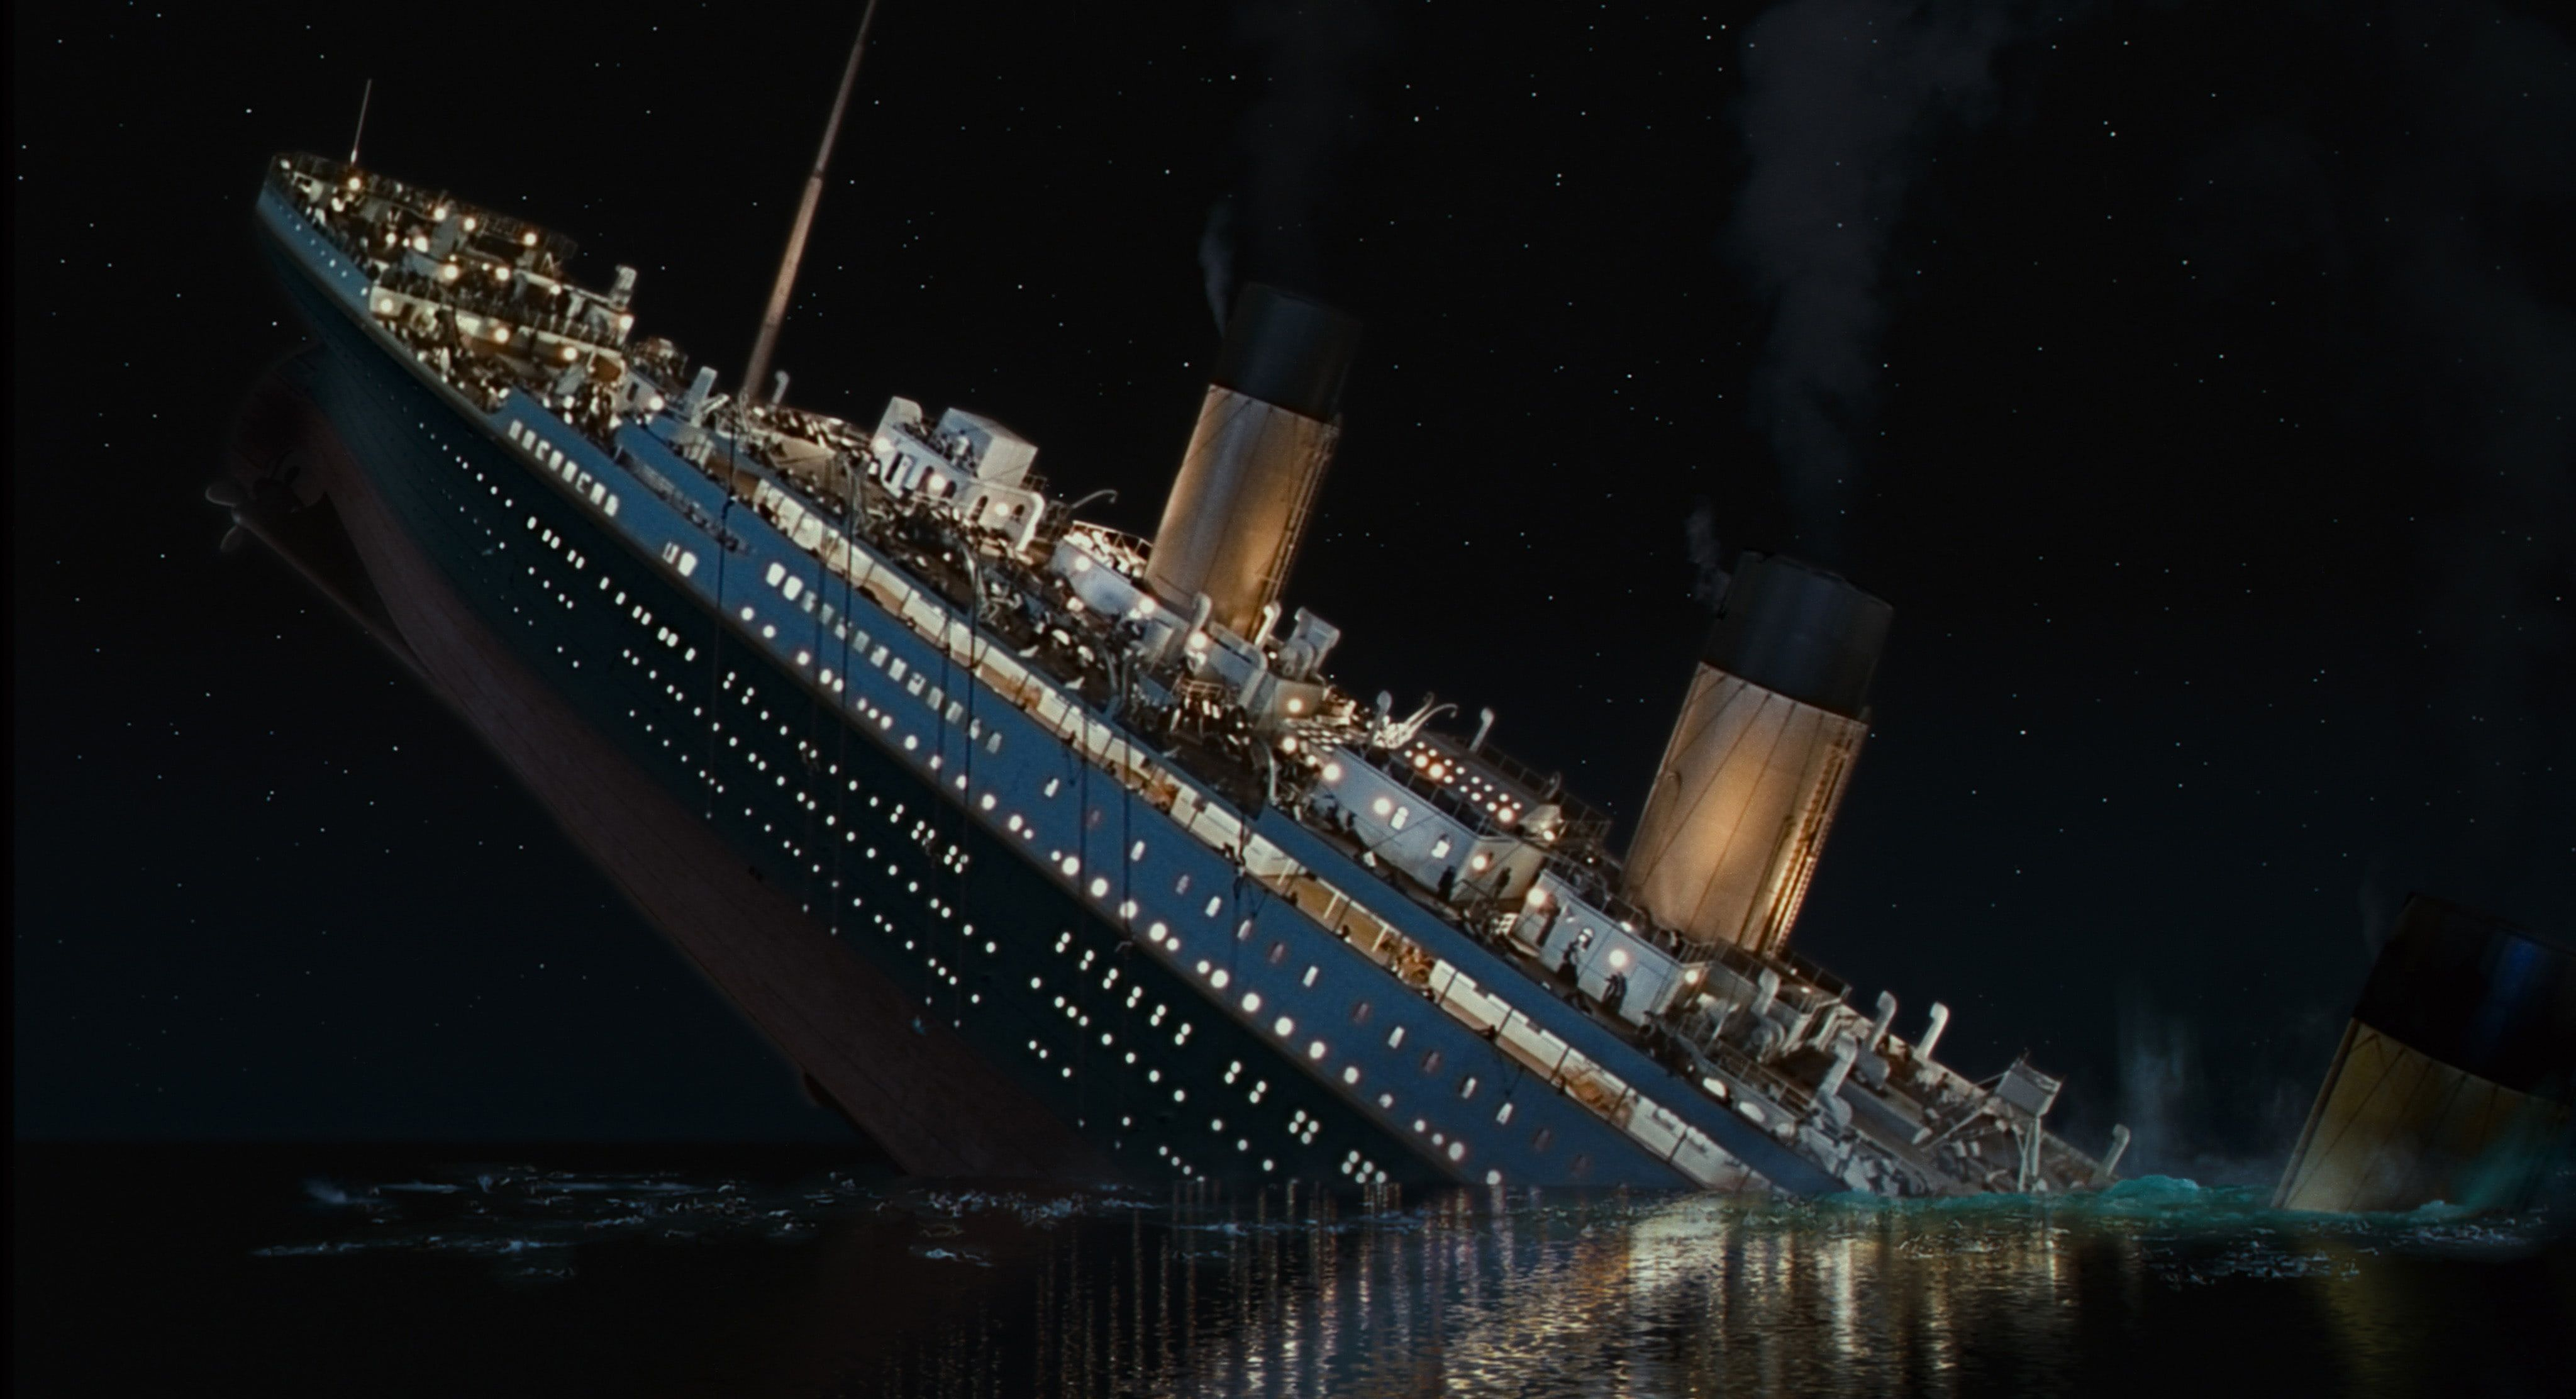

### 1.2 Import Libraries

Pada tahap ini kita perlu melakukan import beberapa library yang digunakan untuk bisa digunakan dalam program python kita.

1. Pandas dan Numpy: Untuk manipulasi dan analisis data.
2. Matplotlib dan Seaborn untuk visualisasi data
3. google.colab.drive: Untuk mengakses file dataset dari Google Drive.
4. RandomForestClassifier, KNeigborsClassifier, DecisionTreeClassifier, GaussianNB, LogisticRegression: Untuk membangun model prediksi dengan task klasifikasi.
5. metrics: Untuk mengevaluasi kinerja model.
6. LabelEncoder: Untuk mengonversi data kategori menjadi numerik sebelum pemrosesan lebih lanjut.

In [66]:
import pandas as pd
import numpy as np
# from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### 1.3 Load Dataset
Pada tahap ini kita menghubungkan file dataset kita yang tersimpan di google dengan file notebook di google colab. Setelah berhasil terhubung maka data tersebut dimuat dalam bentuk data frame

In [67]:
# drive.mount('/content/drive', force_remount=True)
# train_path = '/content/drive/My Drive/titanic_dataset/train.csv' # Akses file dari Google Drive
# test_path = '/content/drive/My Drive/titanic_dataset/test.csv'
# submission_path = '/content/drive/My Drive/titanic_dataset/gender_submission.csv'

train_path = 'dataset/train.csv' # Akses file dari Google Drive
test_path = 'dataset/test.csv'
submission_path = 'dataset/gender_submission.csv'
df_train = pd.read_csv(train_path)# Baca file ke dalam DataFrame
df_test = pd.read_csv(test_path)
df_submission = pd.read_csv(submission_path)

In [ ]:
# Menggabungkan antara data test dan data train menjadi satu dataset
df = pd.concat([df_train, df_test], axis=0)
df.head()

In [ ]:
# Menampilkan data submission
df_submission.head()

### 1.4 Data Understanding
Berikut adalah ringkasan singkat dari fitur dataset Titanic:

1. PassengerId: ID unik untuk setiap penumpang (identitas saja, tidak memengaruhi prediksi).
2. Survived: Label (0 = tidak selamat, 1 = selamat).
3. Pclass: Kelas tiket penumpang (1, 2, 3; terkait dengan status sosial-ekonomi).
4. Name: Nama penumpang (dapat digunakan untuk mengekstrak gelar).
4. Sex: Jenis kelamin (male/female).
5. Age: Usia (berhubungan dengan keselamatan).
6. SibSp: Jumlah saudara/istri yang menemani.
7. Parch: Jumlah orang tua/anak yang menemani.
8. Ticket: Nomor tiket (mungkin tidak langsung relevan).
9. Fare: Harga tiket (berkorelasi dengan Pclass).
10. Cabin: Nomor kabin (bisa memberi informasi lokasi).
11. Embarked: Pelabuhan tempat naik (C, Q, S).


## 2. Exploratory Data Analysis (EDA)

### 2.1 Menampilkan Dimensi Dataset (Jumlah baris dan kolom data)

In [ ]:
df.shape

In [ ]:
df_submission.shape

In [ ]:
df_test.shape

In [ ]:
df_train.shape

file dataset terdiri atas 1309 baris data dan 12 kolom features

### 2.2 Menampilkan Informasi Dataset (Nama atribut, tipe data dll)

In [ ]:
df.info()

Fokus fitur penting: Pclass, Sex, Age, SibSp, Parch, Fare, dan Embarked. Fitur dengan missing values (Age, Cabin, dan Embarked) perlu diimputasi sebelum analisis.

### 2.3 Menampilkan Statistik Desrkiptif dari Dataset

In [ ]:
# menampilkan statistik deskriptif dari dataset
df.describe()

### 2.4 Memeriksa Data yang Hilang dari Dataset

In [ ]:
print(df.isnull().sum())

berdasarkan hasil pengecekan dataset terdapat 3 features yang mengalami *Missing Values* diantaranya sebagai berikut:
1. Age sebanyak 263 baris data (20%)
2. Cabin sebanyak 1014 baris data (77%)
3. Embarked sebanyak 2 baris data
4. Survived sebanyak 418 baris data (32%)

Selanjutnya data yang null tersebut akan kita lakukan pengisian atau penghapusan kolom data untuk menghasilkan data yang clean dan utuh.

In [ ]:
# Menampilkan data dari kolom Survived yang bernilai null
df[df['Survived'].isnull()]

In [79]:
# Mengisi data null dari kolom Survived pada dataset menggunakan data dari df_submission
df['Survived'].fillna(df_submission['Survived'], inplace=True)

In [ ]:
# Mengecek kembali jumlah data null dari kolom Survived
df['Survived'].isnull().sum()

### 2.5. Visualisasi Data

#### 2.5.1 Memvisualisasikan Persentase Jumlah Penumpang Survived dan Tidak ke dalam Pie Chart

In [ ]:
# Menghitung persentase survived dan not survived
survival_counts = df['Survived'].value_counts(normalize=True) * 100
labels = ['Not Survived', 'Survived']  # 0: Not Survived, 1: Survived

# Membuat diagram lingkaran
plt.figure(figsize=(5, 5))
plt.pie(
    survival_counts,
    labels=labels,
    autopct='%1.1f%%',  # Format persentase
    startangle=90,      # Memulai dari sudut 90 derajat
    colors=['lightcoral', 'lightgreen'],  # Warna
    explode=(0, 0.1)  # Memisahkan bagian 'Survived'
)
plt.title('Persentase Survived dan Not Survived')
plt.axis('equal')  # Membuat lingkaran berbentuk bulat
plt.show()

#### 2.5.2 Memvisualisasikan Distribusi Jumlah Penumpang Berdasarkan Gender dan Kelas ke dalam Bar Chart

In [ ]:
# Visualisasi jumlah penumpang berdasarkan gender dan Pclass
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Pclass', hue='Sex', palette='pastel')

# Menambahkan nilai pada masing-masing bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Menambahkan judul dan label
plt.title('Jumlah Penumpang Berdasarkan Gender dan Kelas', fontsize=14)
plt.xlabel('Kelas Penumpang', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.legend(title='Gender', loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()

#### 2.5.3 Memvisualisasikan Jumlah Penumpang yang Survived dan Tidak Berdasarkan Gender ke dalam Bar Chart

In [ ]:
# Visualisasi jumlah penumpang yang Survived dan tidak berdasarkan gender
plt.figure(figsize=(7, 5))
ax2 = sns.countplot(data=df, x='Survived', hue='Sex', palette='cool')

# Menambahkan nilai pada masing-masing bar
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Menambahkan judul dan label
plt.title('Jumlah Penumpang yang Survived Berdasarkan Gender', fontsize=14)
plt.xlabel('Survived (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.legend(title='Gender', loc='upper right')

# Tampilkan plot
plt.tight_layout()
plt.show()

#### 2.5.4 Memvisualisasikan Jumlah Penumpang yang Survived dan Tidak Berdasarkan Kelas ke dalam Bar Chart

In [ ]:
# Visualisasi jumlah penumpang yang Survived dan tidak berdasarkan Kelas Penumpang (Pclass)
plt.figure(figsize=(7, 5))
ax3 = sns.countplot(data=df, x='Survived', hue='Pclass', palette='muted')

# Menambahkan nilai pada masing-masing bar
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Menambahkan judul dan label
plt.title('Jumlah Penumpang yang Survived dan Tidak Berdasarkan Kelas', fontsize=14)
plt.xlabel('Survived (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.legend(title='Kelas', loc='upper right')

# Tampilkan plot
plt.tight_layout()
plt.show()

#### 2.5.5 Memvisualisasikan Distribusi Data Umur Penumpang ke dalam Histogram

In [ ]:
# Histogram dengan Matplotlib
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

#### 2.5.6 Memvisualisasikan Jumlah Survived dan Not Survived berdasarkan kategori umur

In [ ]:
# Menambahkan kolom kategori umur
def categorize_age(age):
    if age < 15: # dibawah 15 tahun -> Anak-anak
        return "Children"
    elif age >= 15 and age < 60: # 15 - 60 tahun -> Dewasa
        return "Adults"
    elif age >= 60:
        return "Elderly" # di atas 60 tahun -> Lansia
    else:
        return "Unknown" # umur tidak diketahui

df['Age_Category'] = df['Age'].apply(categorize_age)

# Menghitung jumlah Survived dan Not Survived per kategori umur
result = df.groupby(['Age_Category', 'Survived']).size().unstack(fill_value=0)

# Menambahkan label untuk Survived dan Not Survived
result.columns = ['Not Survived', 'Survived']

# Menampilkan hasil
print("Total Survived and Unsurvived by Age:")
result

In [ ]:
df.head()

In [ ]:
# Membuat visualisasi bar chart
ax = result.plot(kind='bar', figsize=(7, 5), color=['lightcoral', 'lightgreen'])

# Menambahkan detail pada visualisasi
plt.title('Jumlah Survived dan Not Survived Berdasarkan Kategori Umur', fontsize=16)
plt.xlabel('Kategori Umur', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=0)  # Rotasi label sumbu x
plt.legend(title='Status', fontsize=12)

# Menampilkan nilai di atas masing-masing bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Menampilkan plot
plt.tight_layout()
plt.show()

## 3. Data Pre-Processing

### 3.1 Menghapus Kolom yang Tidak diperlukan

Pada tahap ini kita akan menghapus kolom Cabin dari dataset dikarenakan jumlah data yang hilang terlalu signifikan serta kolom PassengerId, Name, dan Ticket karena hanya sebegai identitas

In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Age_Category'], axis=1, inplace=True)
df.head()

In [ ]:
df.info()

### 3.2 Mengisi *Missing Values* dengan Teknik Imputasi

#### 3.2.1 Mengisi *Missing Values* pada kolom data kategorikal
Pada tahap ini kita mengisi *Missing Values* pada kolom Embarked dengan teknik imputasi modus

In [ ]:
# Menampilkan data null dari kolom Embarked
print(df[df['Embarked'].isnull()])

In [ ]:
# menampilkan jumlah untuk masing-masing nilai dari kolom Embarked
df['Embarked'].value_counts()

In [93]:
# Mengisi Missing Values pada kolom Embarked menggunakan data modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Mengecek kembali jumlah data null untuk kolom Embarked
df['Embarked'].isnull().sum()

Output 0 menunjukkan bahwa semua baris data pada kolom Embarked telah terisi

#### 3.2.2 Mengisi *Missing Values* pada kolom data Numerikal
Pada tahap ini kita mengisi *Missing Values* pada kolom Age dengan teknik imputasi mean

In [ ]:
# Mengecek jumlah nilai Null pada kolom Age
df['Age'].isnull().sum()

In [ ]:
# Mengisi nilai Missing Values pada kolom Age dengan data Mean
mean_of_age = df['Age'].mean().round()
df['Age'].fillna(mean_of_age, inplace=True)

mean_of_age

In [ ]:
# Mengecek kembali jumlah nilai Null pada kolom Age
df['Age'].isnull().sum()

Output 0 menunjukkan bahwa semua baris data pada kolom Age telah terisi

In [ ]:
# Mengecek kembali jumlah data null pada dataset
df.isnull().sum()

#### 3.2.3 Mengisi Missing Values pada Kolom Fare

In [ ]:
# Menampilkan kolom Fare yang berisi nilai null
df[df['Fare'].isnull()]

Harga tiket (Fare) berkorelasi dengan Kelas Penumpang (Pclass)

In [ ]:
# Menampilkan semua data yang memiliki nilai pCLass = 3
df[df['Pclass'] == 3]

In [101]:
# Hitung nilai modus dari kolom Fare pada data tersebut
mode_fare = df[df['Pclass'] == 3]['Fare'].mode()

In [102]:
# Mengisi kolom Fare yang bernilai null dengan nilai modus yang diperoleh tersebut
df['Fare'].fillna(mode_fare[0], inplace=True)

### 3.3 Mengubah Data Kategorikal Menjadi Numerikal
Pada tahap ini kita akan mengubah data kategorikal dari kolom Sex dan Embarked menjadi Numerik agar lebih mudah diproses oleh komputer


#### 3.3.1 Konversi data pada kolom Sex menggunakan teknik *Binary Converting*

In [ ]:
# Mengubah data kategorikal pada kolom Sex menjadi Numerik
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex']) # 0=female 1=male
df.head()

#### 3.3.2 Konversi data pada kolom Embarked menggunakan teknik *One Hot Encoding*

In [ ]:
# Mengubah data kategorikal pada kolom embarked menjadi Numerik menggunakan One Hot Encoding
embarked = pd.get_dummies(df['Embarked'])
embarked.head()

In [ ]:
# Menggabungkan dataset sebelumnya dengan embarked dummies dan menghapus kolom Embarked
df = pd.concat([df, embarked], axis=1)
df.drop('Embarked', axis=1, inplace=True)
df.head()

## 4. Modelling

### 4.1 Menentukan Variabel Input dan Output

In [ ]:
# Memisahkan variabel input dan output
X = df.drop('Survived', axis=1) # input or independent variable
y = df['Survived'] # output or dependent variable

X

In [ ]:
y

### 4.2 Membagi Dataset menjadi Data Train dan Data Test

In [108]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.319, random_state=42)

###4.3 Membangun Model

#### 4.3.1 Random Forest

In [ ]:
# Melatih data train menggunakan random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Menguji model dengan data test
y_pred = rf_model.predict(X_test)
# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy_rf * 100))

In [ ]:
# Menampilkan classification report
print(classification_report(y_test, y_pred))

In [112]:
# tuning hyperparameter grid search
from sklearn.model_selection import GridSearchCV


#### 4.3.2 K Nearest Neigbours

In [ ]:
# training data menggunakan K Nearest Neighour
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

In [ ]:
# testing model menggunakan data test
y_pred = knn_model.predict(X_test)
# Menghitung akurasi model
accuracy_knn = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy_knn * 100))

#### 4.3.3 Decision Tree

In [ ]:
# Training data menggunakan Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

In [ ]:
# Testing model menggunakan data train
y_pred = dt_model.predict(X_test)
# Menghitung akurasi model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy_dt * 100))

#### 4.3.4 Naive Baiyes

In [ ]:
# Training data menggunakan Naive Baiyes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

In [ ]:
# Testing Model menggunakan data train
y_pred = nb_model.predict(X_test)
# Menghitung akurasi model
accuracy_nb = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy_nb * 100))

#### 4.3.5 Logistic Regression

In [ ]:
# Melatih data train menggunakan logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

In [ ]:
# testing model menggunakan data test
y_pred = lr_model.predict(X_test)
# Menghitung akurasi model
accuracy_lr = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy_lr * 100))

## 5. Result

In [ ]:
# Membuat DataFrame
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy': [accuracy_rf * 100, accuracy_knn * 100, accuracy_dt * 100, accuracy_nb * 100, accuracy_lr * 100]
})

# Warna untuk setiap bar
colors = ['#AEC6CF', '#FFB347', '#FDFD96', '#77DD77', '#CFCFC4']

# Visualisasi Bar Chart
plt.figure(figsize=(8, 4))
plt.bar(models['Model'], models['Accuracy'], color=colors, edgecolor='black')

# Menambahkan detail pada grafik
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)  # Batas akurasi dari 0% hingga 100%

# Menambahkan nilai akurasi pada setiap bar
for index, value in enumerate(models['Accuracy']):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Tampilkan grafik
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**KESIMPULAN**

Berdasarkan hasil pemodelan maka diperoleh kesimpulan bahwa Algoritma Random Forest memberikan akurasi terbaik mencapai 88.04% untuk studi kasus Titanic Project